<a href="https://colab.research.google.com/github/rayanustrip/Course/blob/master/MultiCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
## Factors affecting the pricing of cars in the American market Study



#### Problem Statement:

A Chinese automobile company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Essentially, the company wants —


- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

#### Business Goal

Create a model keeping the price of cars a constant/target from the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
#load the input file

car = pd.read_csv("CarPrice_Assignment.csv")
car_dict = pd.read_csv("DataDictionary_mediacompany.csv")


In [ ]:
# Read all the column values
pd.set_option('display.max_columns', 50)
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. As part of this assignment we need only company name as the independent variable for model building.

In [ ]:
# Substring the car name from the variable named CarName.

car['CarName'] = car['CarName'].str.split(' ').str[0]
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Removed Car model from the CarName column

In [ ]:
car.shape

(205, 26)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Car info shows no non-null values are in the entire datasets. so no need to imput any values.

In [ ]:
round(car.describe(),2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


I could not find outlier which make us to worry.

## Step 2: Visualising the Data

Let's now **understanding the data**.
- Any multicollinearity going on,
- is there any predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

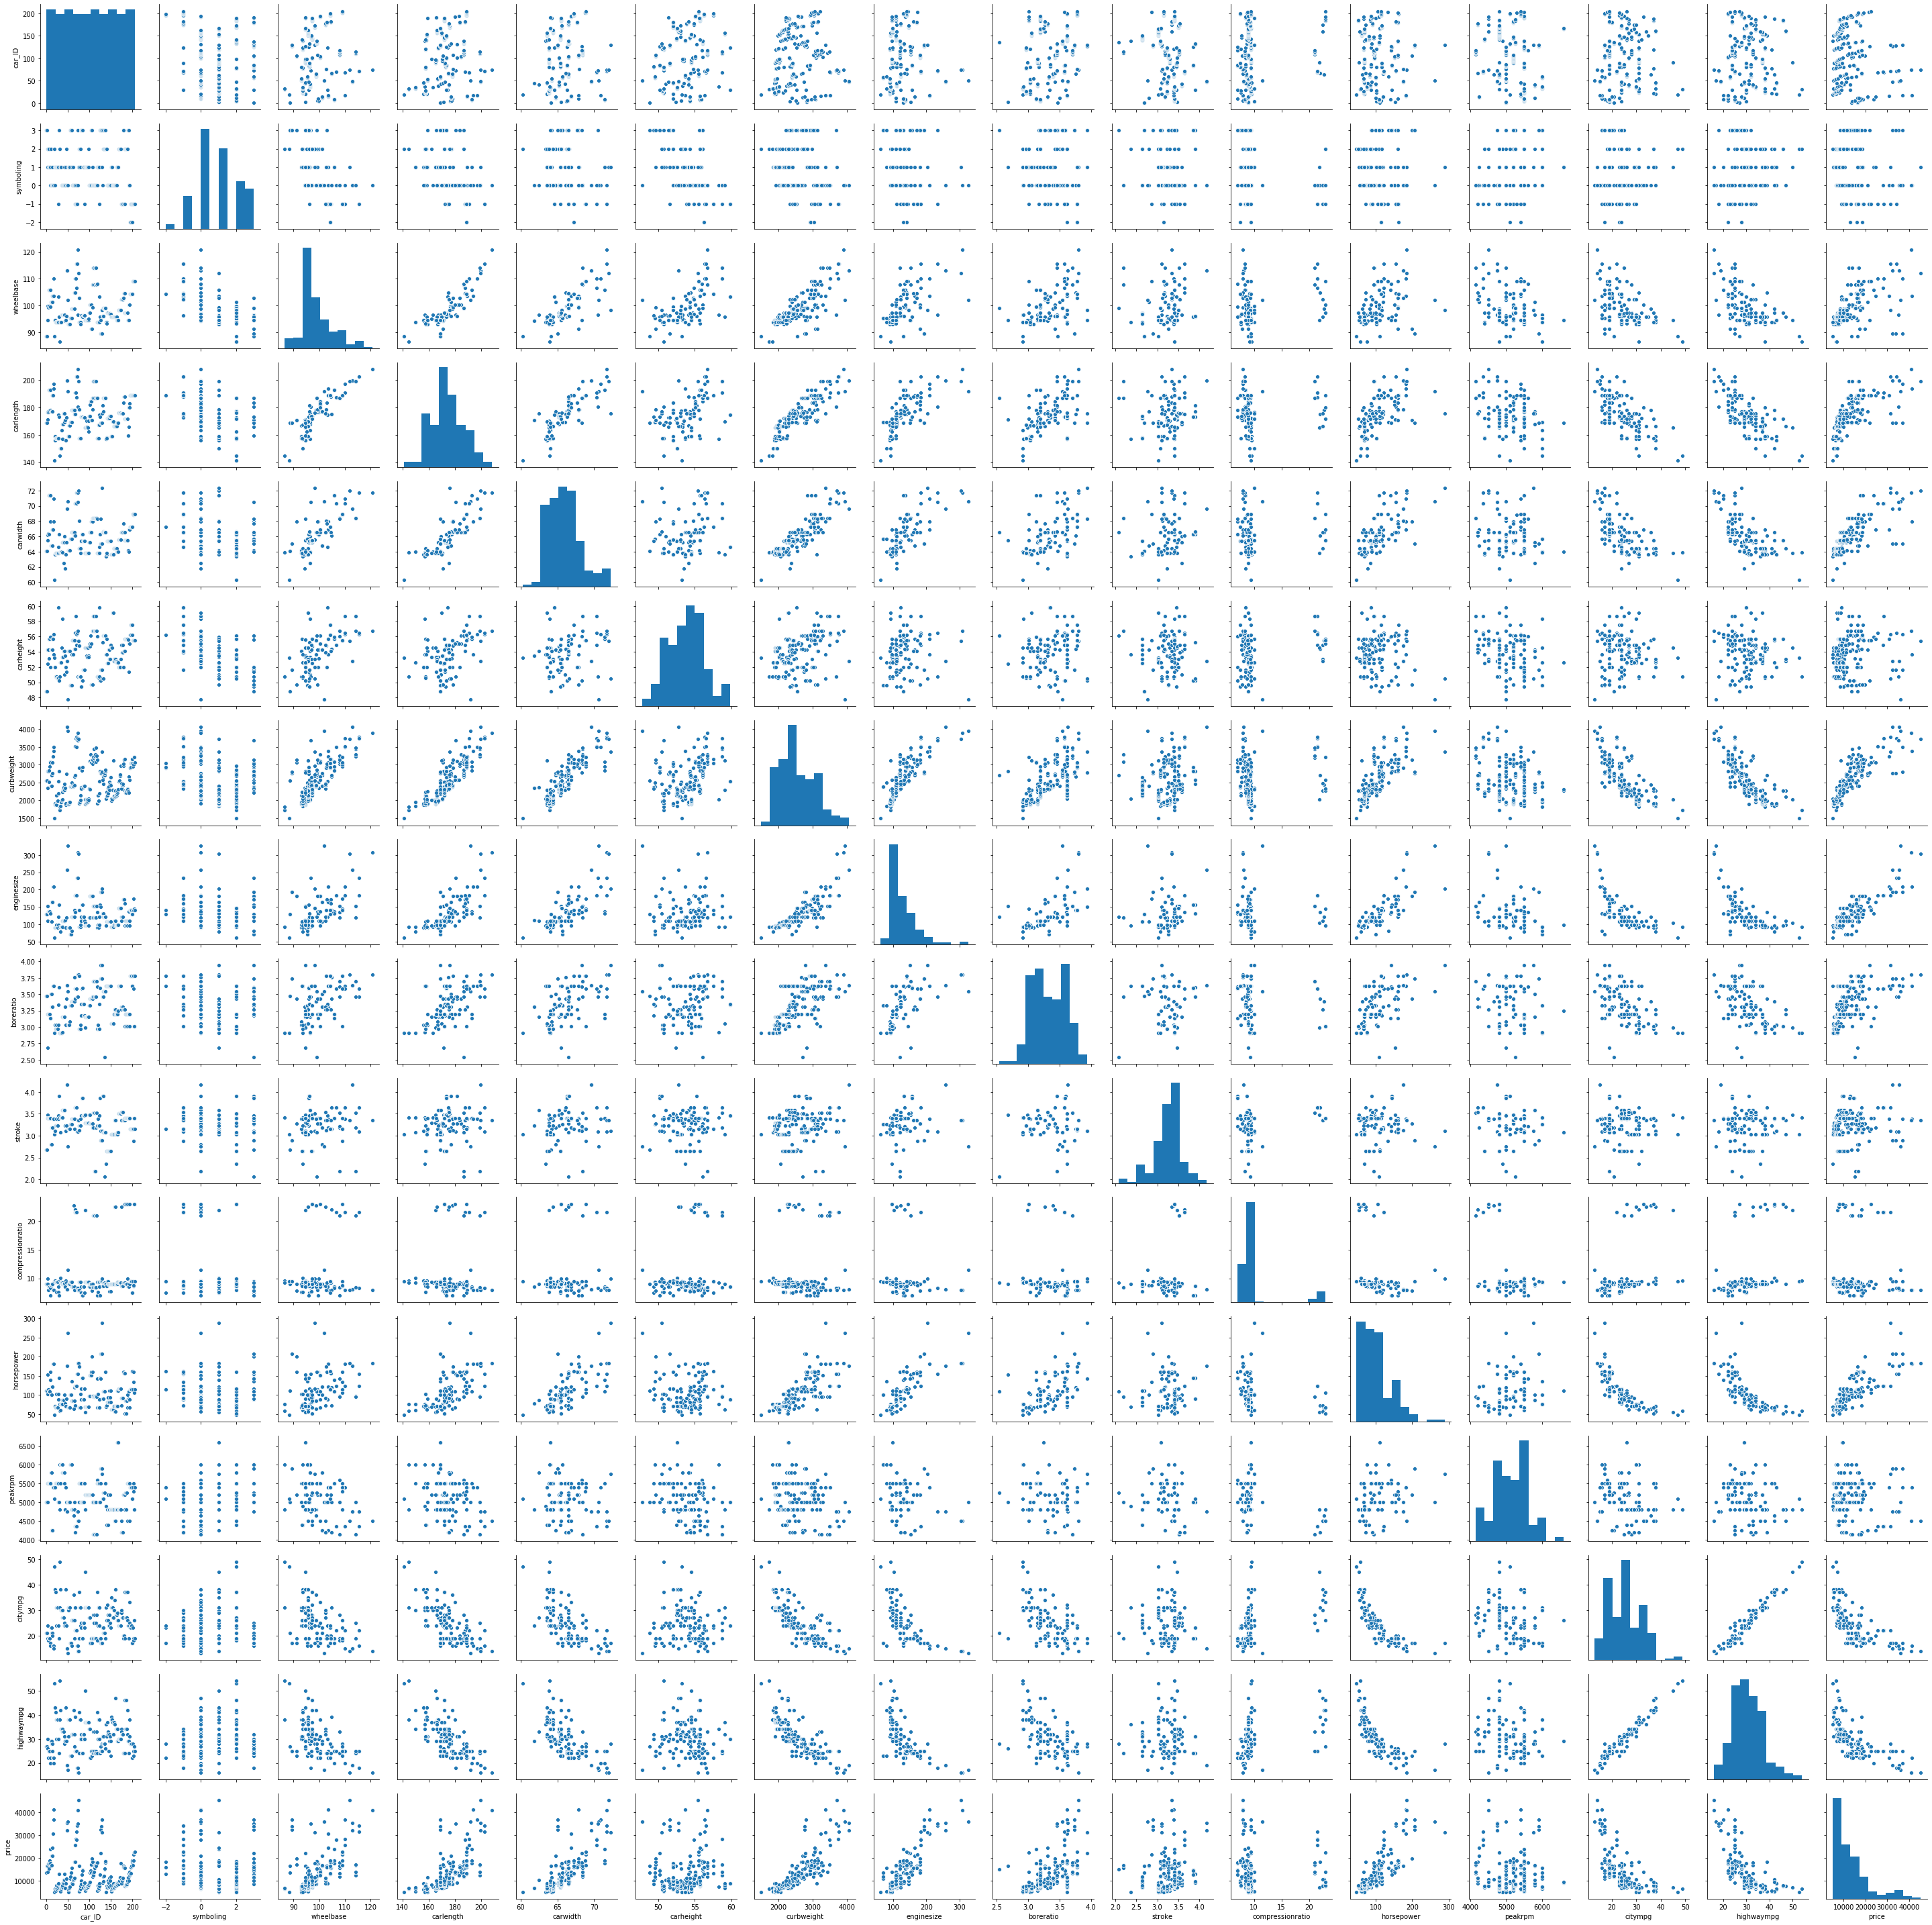

In [ ]:
sns.pairplot(car)
plt.show()

- we can see carlength, carwidth,curbweight,enginesize and horsepower are having high linear correlation with price
- highwaympg, citympg, peakrpm, compressionration, stroke, boreratio, carheight, carwidth, wheelbase & symboling are do not have much correlations with price

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

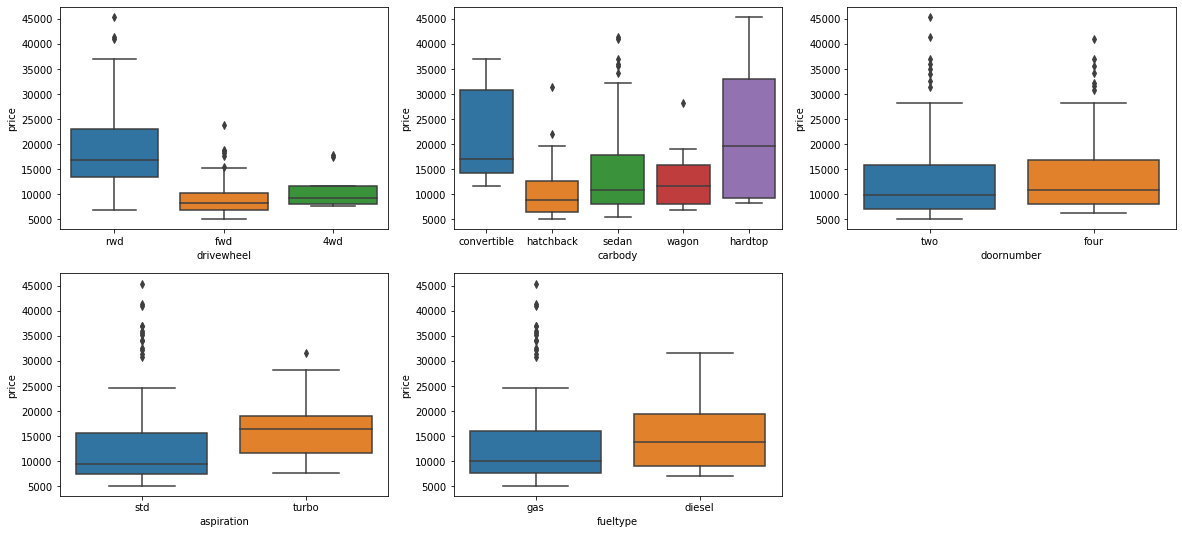

In [ ]:
plt.figure(figsize=(20, 9))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.show()

Real wheel drive are commonly sold and having price range from 14k to 24k
convertible and hardtop are more sold cars, having price range from 9k to 45k
no of doors do not have much impact on the price
Turbo cars bit pricey then standard
Diesel are more popular than gas and bit pricy too

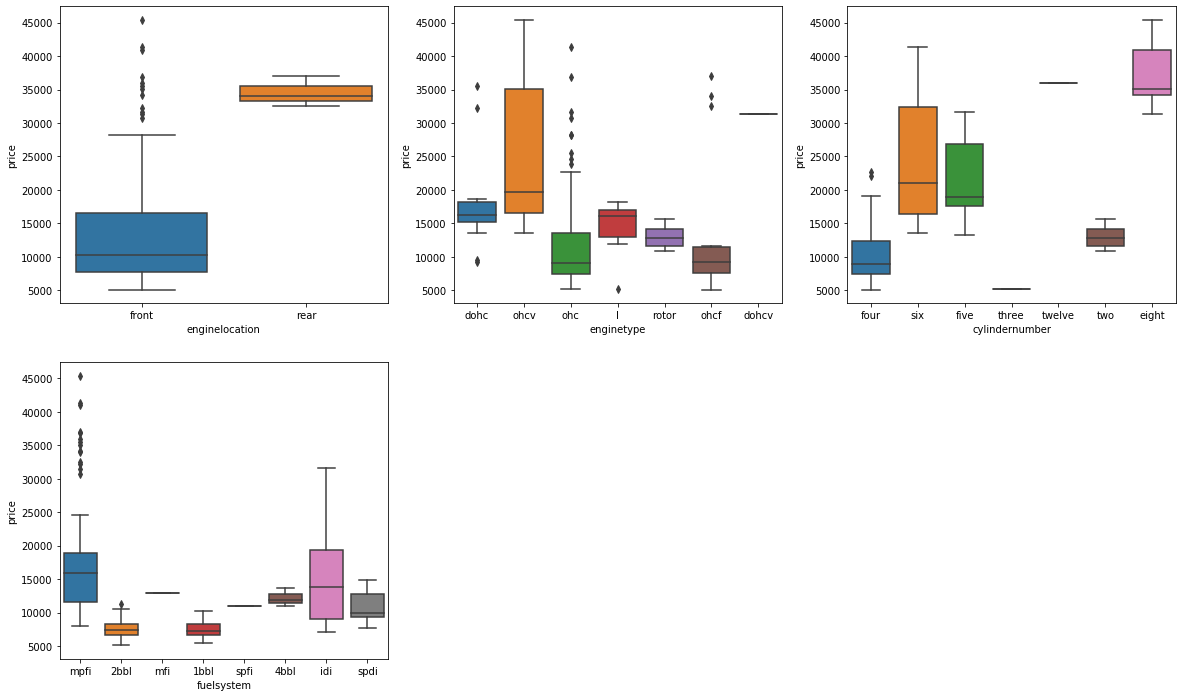

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

Rear wheel engine located on the rear are more costlier than front.
ohcv - Engine types are available from mid to high band cars
eight cycliners engine are most costlier than others. However 6 cycliner seems to be available from mid to high price bracket
mpfi and idi fuel systems are covered middle to high range price

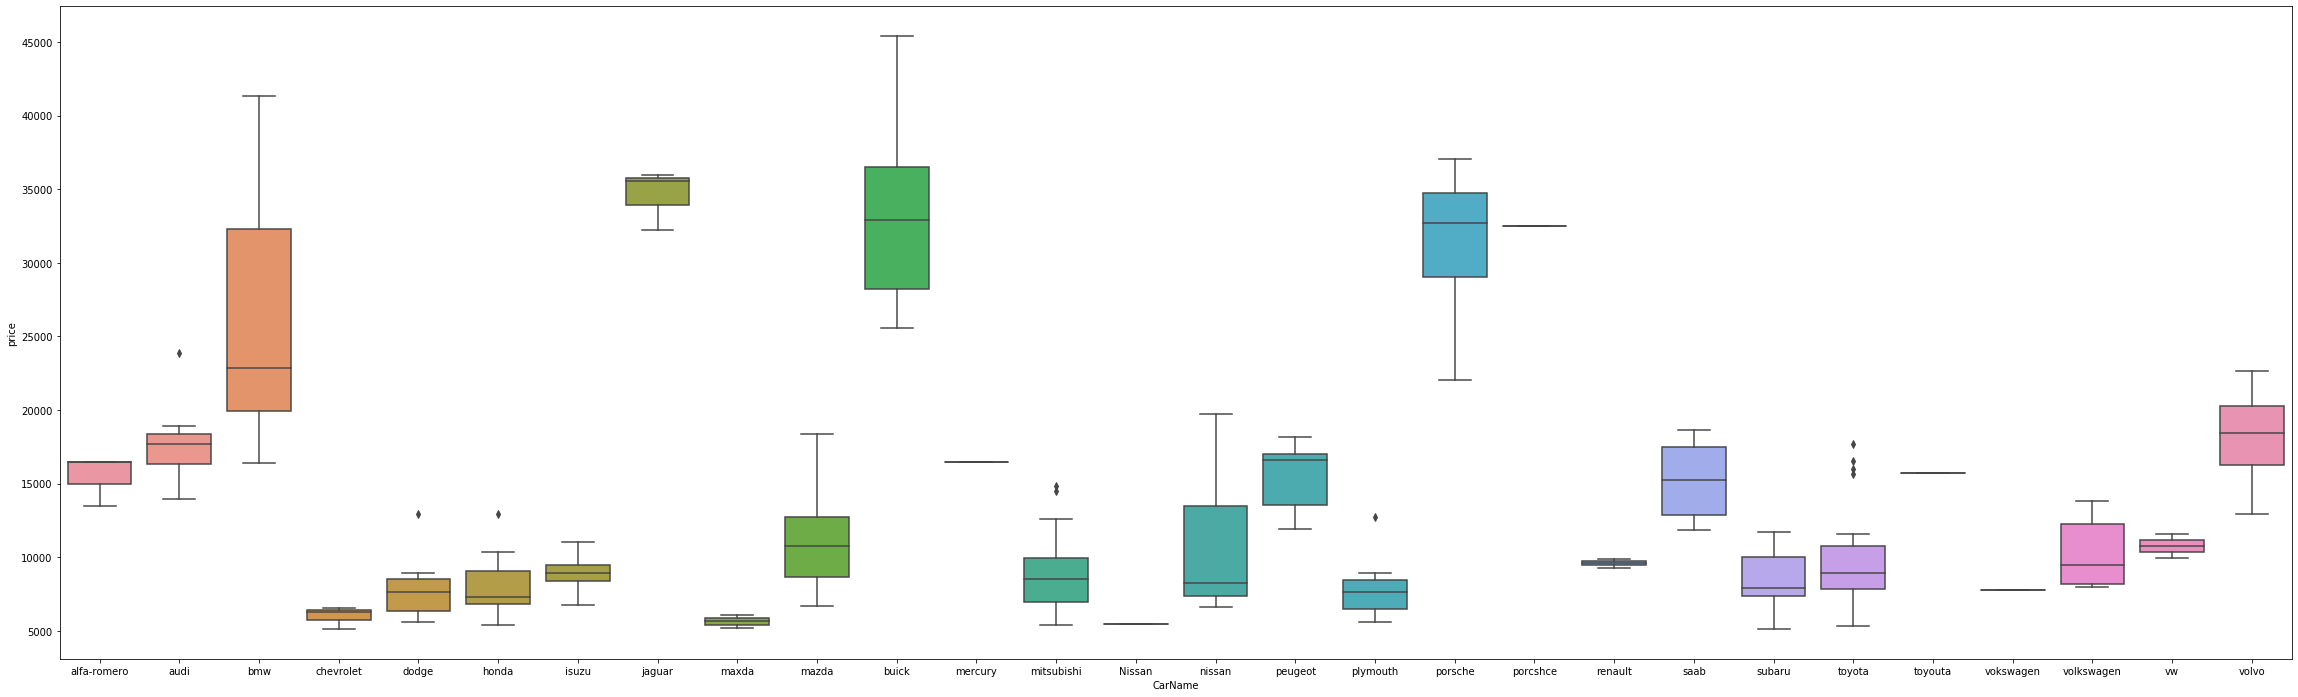

In [ ]:
plt.figure(figsize=(40, 12))
sns.boxplot(x = 'CarName', y = 'price', data = car)
plt.show()

There are some duplication / invalid the car names - so i have renamed those.
Example: maxda and mazda, Nissan and nissan, prosche and porcshce,toyota,toyouta,vokswage,volkswagen, vw.

In [ ]:
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:

car.CarName = car.CarName.str.lower()

def re_name(x,y):
    car.CarName.replace(x,y,inplace=True)

re_name('maxda','mazda')
re_name('Nissan','nissan')
re_name('porcshce','porsche')
re_name('toyouta','toyota')
re_name('vokswagen','volkswagen')
re_name('vw','volkswagen')

car.CarName.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

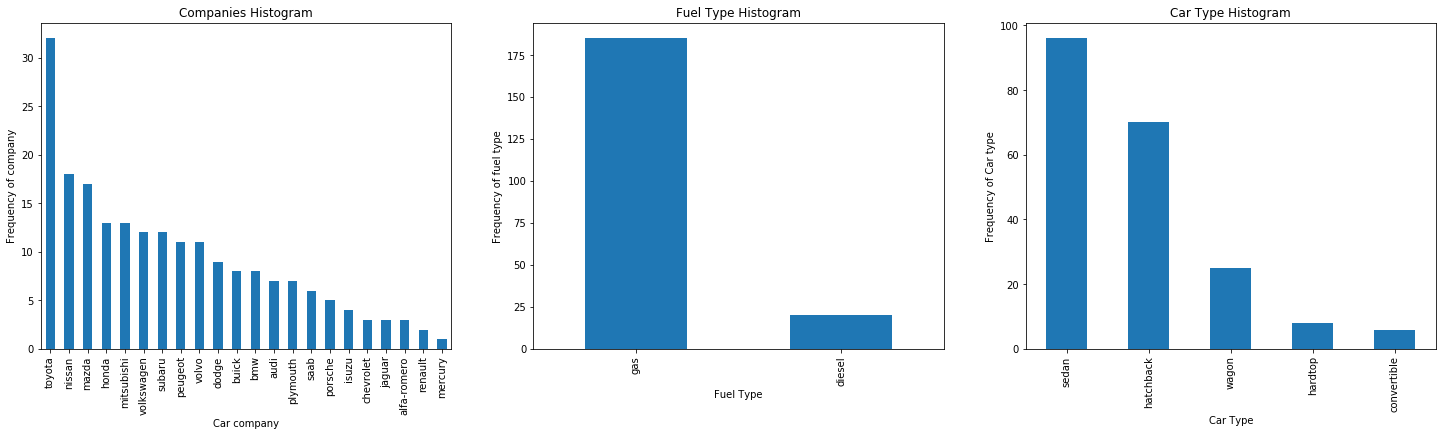

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car.CarName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = car.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = car.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

- Toyota seems to be very popular selling cars
- Gas fuel type cars are more compare to Diesel
- car type sedan are more than other (may be popular)

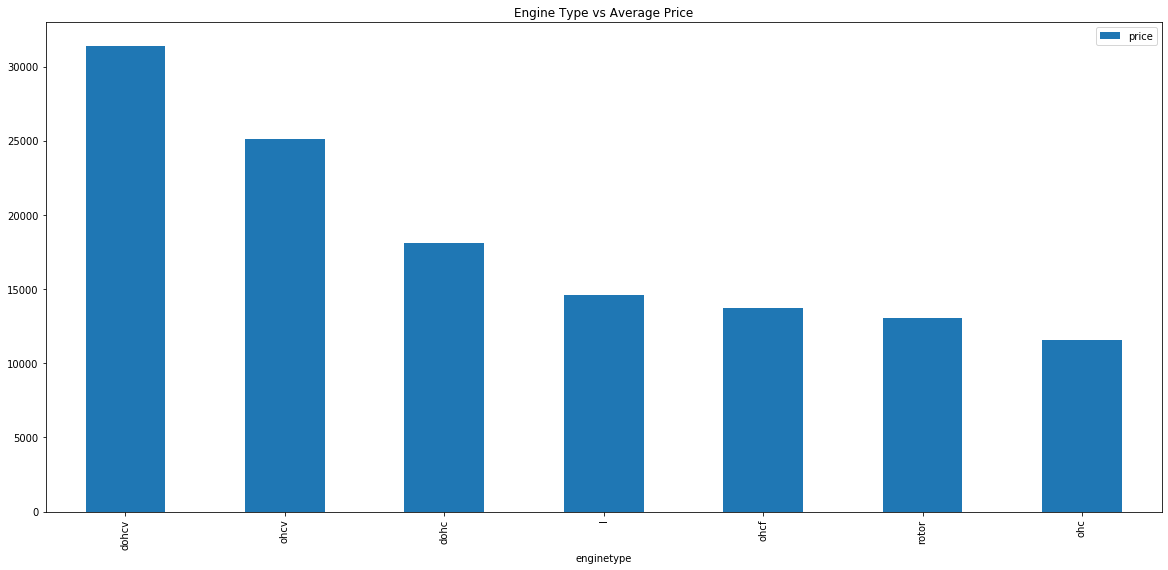

In [ ]:
df_Avg = pd.DataFrame(car.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df_Avg.plot.bar(figsize=(20,9))
plt.title('Engine Type vs Average Price')
plt.show()

-dohcv engine type are more common also available from low to high price

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `enginetype` with `enginelocation` as the hue.

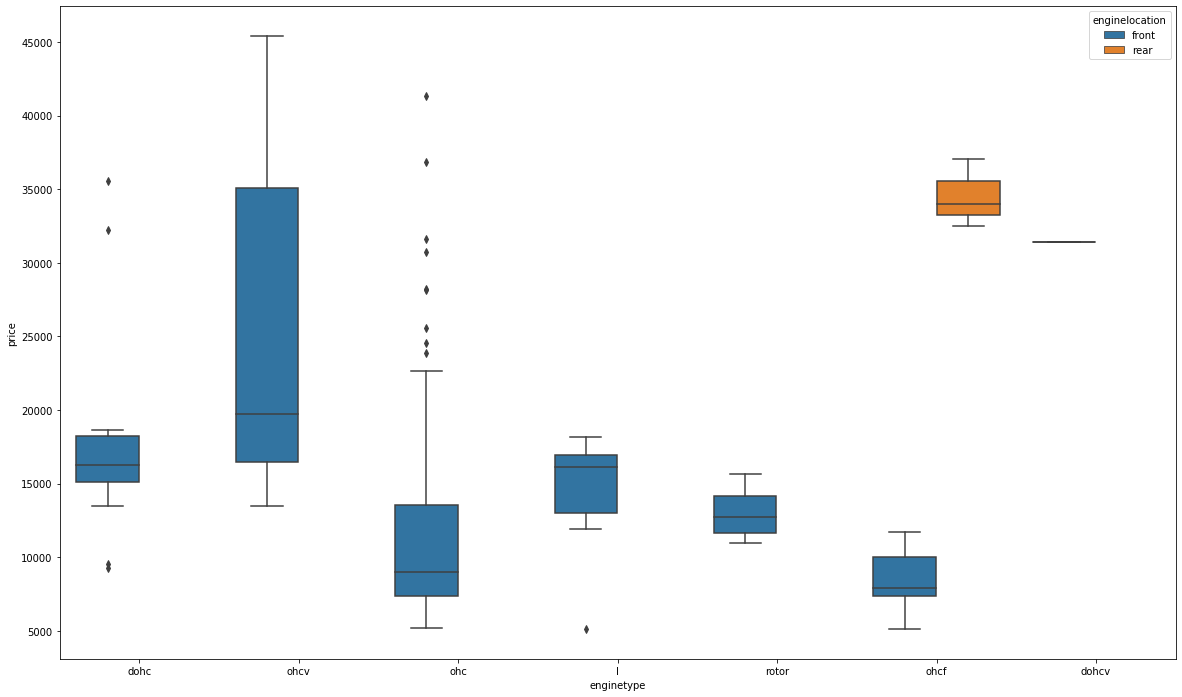

In [ ]:
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = car)
plt.show()

Looks of it engine located in the rear is more costlier then the engine located in the front.

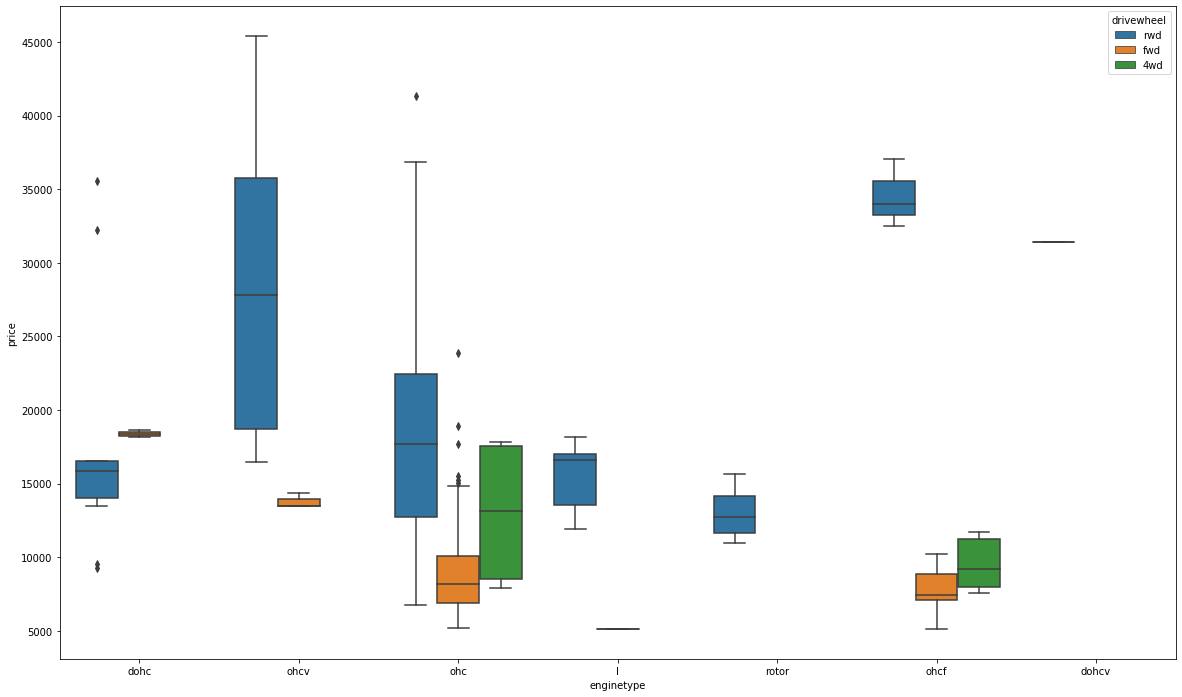

In [ ]:
# Hue with drivewheel
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'drivewheel', data = car)
plt.show()

- rear wheel drive are more common than others type of drive

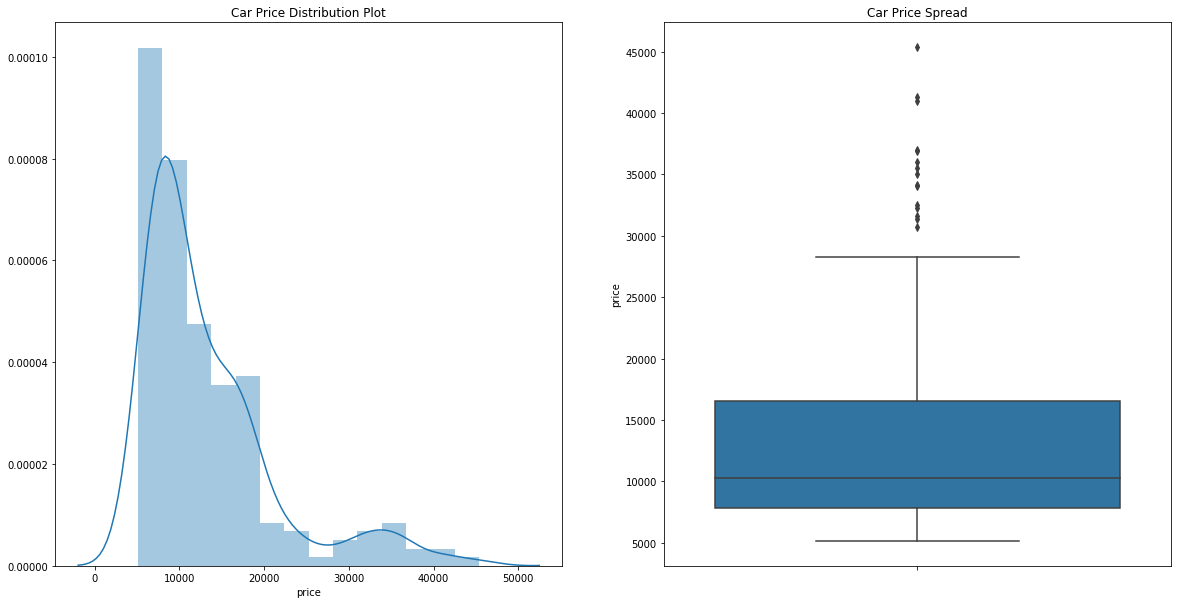

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [ ]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


1. The plot shows the median is around 10000 also the line is pritty closer to 25% prcentiles. Which means the data sets has more of low range cars.
2. Mean is less than 10000 and significant difference between mean and median.
3. 75% precentail of cars below 18500 and remaining 25% are above 18500

### Deriving new features

In [ ]:
#sector segregatiion on the Car Companies based on avg prices of each Companies using binning method
car['price'] = car['price'].astype('int')
dt_temp = car.copy()
table = dt_temp.groupby(['CarName'])['price'].mean()
dt_temp = dt_temp.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
car_bin=['Lowend','Medium','Topend']
car['carcategory'] = pd.cut(dt_temp['price_y'],bins,right=False,labels=car_bin)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcategory
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


<Figure size 2160x720 with 0 Axes>

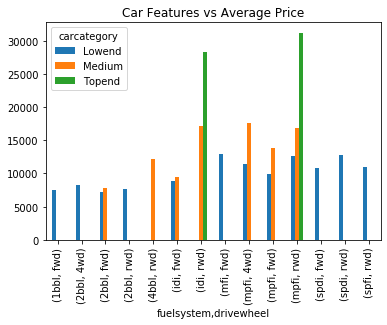

In [ ]:
plt.figure(figsize=(30, 10))

df = pd.DataFrame(car.groupby(['fuelsystem','drivewheel','carcategory'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Features vs Average Price')
plt.show()

- real wheel drive with idi and mpfi fuelsystem are priced at Topend

## Step 3: Data Preparation



- You can see that your dataset has many columns with the categorical values

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcategory
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


### Dummy Variables

The variable `carbody` has four levels. We need to convert these levels into integer as well.

For this, I have use something called `dummy variables`.

In [ ]:
# Get the dummy variables for the features below which we believe has a significant relationship with price
car_lr = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
'carlength','carwidth','carcategory']]


car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,carcategory
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


In [ ]:
# Defining the map function
def fundummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# calling the function to map the dummies

car_lr = fundummies('fueltype',car_lr)
car_lr = fundummies('aspiration',car_lr)
car_lr = fundummies('carbody',car_lr)
car_lr = fundummies('drivewheel',car_lr)
car_lr = fundummies('enginetype',car_lr)
car_lr = fundummies('cylindernumber',car_lr)
car_lr = fundummies('carcategory',car_lr)

In [ ]:
car_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Topend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaler = MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize','horsepower','boreratio','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Topend
122,-0.700200,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,-0.487238,-0.924500,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1.151931,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.359789,1.114978,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,-0.452246,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,-0.375720,-0.833856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.442648,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.367754,-0.788535,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.757571,0.972390,1.137720,0.123485,1.201877,1.501822,1.225364,0.616439,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Topend
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,6.055762e-17,1.538785e-15,-1.894367e-16,-4.308908e-17,-1.059758e-15,1.195625e-16,2.003060e-16,-4.093074e-15,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,-1.020393e+00,-2.006930e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-1.378157e+00,-2.574223e+00,-2.510760e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.072696e-01,-6.771770e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-8.223718e-01,-6.186702e-01,-8.565171e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.674101e-01,-3.405307e-01,-2.478347e-01,-3.663447e-01,9.948427e-03,-2.160603e-01,-1.128552e-01,-1.993522e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.381493e-01,4.505882e-01,7.203955e-01,3.928914e-01,8.942829e-01,3.397252e-01,7.076008e-01,4.804736e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.632365e+00,2.874442e+00,2.812547e+00,4.923816e+00,2.432256e+00,4.684957e+00,2.324616e+00,2.927846e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


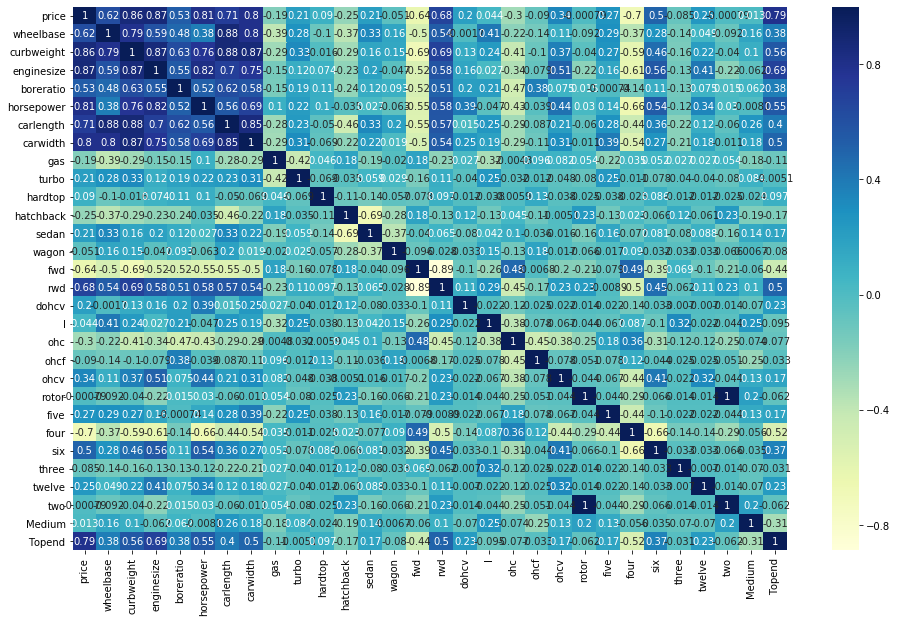

In [ ]:
# Let's check the correlation coefficients to see which variables are having significantly correlated to price

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can notice, 'carlength`,'horsepower','enginesize','rwd','curbweight' &'Topend' are having high correlation to the `price`

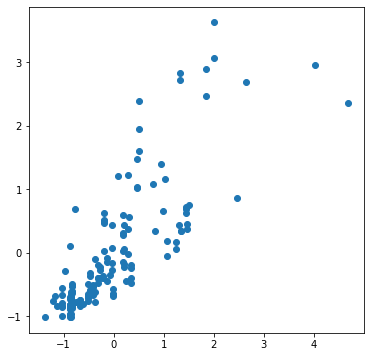

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.horsepower, df_train.price)
plt.show()

- its clear that when hoursepower increases the price also increase - so, it has positive correlations

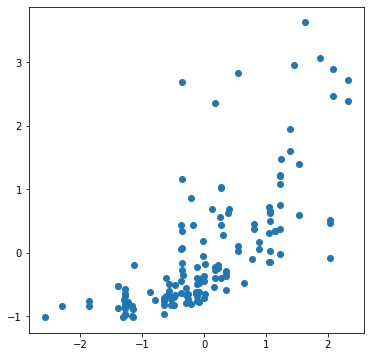

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.carlength, df_train.price)
plt.show()

- car length increase the car price

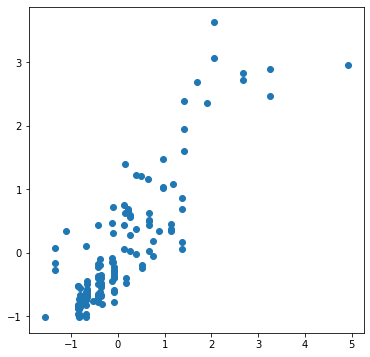

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

- enginesize increase so does the price

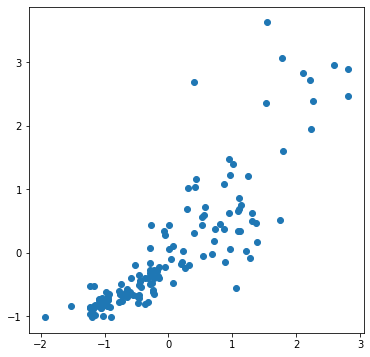

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 6
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('curbweight', False, 3),
 ('enginesize', False, 15),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', True, 1),
 ('turbo', False, 10),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 14),
 ('rwd', False, 7),
 ('dohcv', True, 1),
 ('l', False, 13),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', True, 1),
 ('rotor', False, 2),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 8),
 ('twelve', True, 1),
 ('two', True, 1),
 ('Medium', False, 6),
 ('Topend', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['horsepower', 'carwidth', 'gas', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'ohcv', 'five', 'four', 'six', 'twelve', 'two',
       'Topend'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lr1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.43e-68
Time:                        19:21:42   Log-Likelihood:                -6.6744
No. Observations:                 143   AIC:                             45.35
Df Residuals:                     127   BIC:                             92.75
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2410      0.245      5.073      0.0

- hardtop has high p-value  value so, it is insignificant. so lets drop and model it again

In [ ]:
X_train_new = X_train_rfe.drop(["hardtop"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'horsepower', 'carwidth', 'gas', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'ohcv', 'five', 'four', 'six', 'twelve', 'two', 'Topend'],
      dtype='object')

#### Model 2

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.24e-68
Time:                        19:21:42   Log-Likelihood:                -7.7850
No. Observations:                 143   AIC:                             45.57
Df Residuals:                     128   BIC:                             90.01
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1390      0.235      4.855      0.0

- we can observe that two has high p value >0.05. So lets rebuild model

In [ ]:
X_train_new = X_train_new.drop(["two"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'horsepower', 'carwidth', 'gas', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'ohcv', 'five', 'four', 'six', 'twelve', 'Topend'],
      dtype='object')

#### Model 3

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train,X_train_lr3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.60e-69
Time:                        19:21:42   Log-Likelihood:                -9.1956
No. Observations:                 143   AIC:                             46.39
Df Residuals:                     129   BIC:                             87.87
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8912      0.177      5.035      0.0

- six has high p value so lets remove and rebuild the model

In [ ]:
X_train_new = X_train_lr3.drop(["six"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'horsepower', 'carwidth', 'gas', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'ohcv', 'five', 'four', 'twelve', 'Topend'],
      dtype='object')

#### Model 4

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train,X_train_lr4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.90e-70
Time:                        19:21:42   Log-Likelihood:                -9.5422
No. Observations:                 143   AIC:                             45.08
Df Residuals:                     130   BIC:                             83.60
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8335      0.161      5.174      0.0

- twelve has high p value, so lets remove it and rebuild the model

In [ ]:
X_train_new = X_train_lr4.drop(["twelve"], axis = 1)

In [ ]:
X_train_new.columns

Index(['const', 'horsepower', 'carwidth', 'gas', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'ohcv', 'five', 'four', 'Topend'],
      dtype='object')

Model 5

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train,X_train_lr5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.40e-71
Time:                        19:21:42   Log-Likelihood:                -10.204
No. Observations:                 143   AIC:                             44.41
Df Residuals:                     131   BIC:                             79.96
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8628      0.159      5.427      0.0

 lets remove ohcv having high p value

In [ ]:
X_train_new = X_train_lr5.drop(["ohcv"], axis = 1)

Model 6

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train,X_train_lr6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     177.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.92e-71
Time:                        19:21:42   Log-Likelihood:                -11.944
No. Observations:                 143   AIC:                             45.89
Df Residuals:                     132   BIC:                             78.48
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7959      0.156      5.106      0.0

five has high p value, lets remove and rebuild that

In [ ]:
X_train_new = X_train_lr6.drop(["five"], axis = 1)

Model 7

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr7 = sm.add_constant(X_train_new)

lr7 = sm.OLS(y_train,X_train_lr7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.67e-72
Time:                        19:21:42   Log-Likelihood:                -13.514
No. Observations:                 143   AIC:                             47.03
Df Residuals:                     133   BIC:                             76.66
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7264      0.152      4.792      0.0

- has good p values so lets do the VIF

In [ ]:
X_train_lr7 = X_train_lr7.drop('const',axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lr7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,gas,10.86
7,four,6.49
4,sedan,5.84
3,hatchback,4.42
0,horsepower,3.66
1,carwidth,2.75
5,wagon,2.46
8,Topend,1.74
6,dohcv,1.26


- gas has high vif values so lets remove it and rebuild it.

In [ ]:
X_train_new = X_train_lr7.drop(["gas"], axis = 1)

Model 8

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr8 = sm.add_constant(X_train_new)

lr8 = sm.OLS(y_train,X_train_lr8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.86e-71
Time:                        19:21:42   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4709      0.133      3.548      0.0

In [ ]:
X_train_lr8 = X_train_lr8.drop('const',axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lr8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,four,5.66
3,sedan,3.35
0,horsepower,2.72
2,hatchback,2.40
1,carwidth,2.22
7,Topend,1.73
4,wagon,1.71
5,dohcv,1.24


- lets remove 'four' and rebuild the model

In [ ]:
X_train_new = X_train_lr8.drop(["four"], axis = 1)

Model 9

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lr9 = sm.add_constant(X_train_new)

lr9 = sm.OLS(y_train,X_train_lr9).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.70e-70
Time:                        19:21:42   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.116      2.096      0.0

In [ ]:
X_train_lr9 = X_train_lr9.drop('const',axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lr9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.45
1,carwidth,2.12
6,Topend,1.70
3,sedan,1.22
5,dohcv,1.22
2,hatchback,1.10
4,wagon,1.02


- all the VIF values are looking good. So this will be our final model

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
lm = sm.OLS(y_train,X_train_lr9).fit()
y_train_price = lm.predict(X_train_lr9)


Text(0.5, 0, 'Errors')

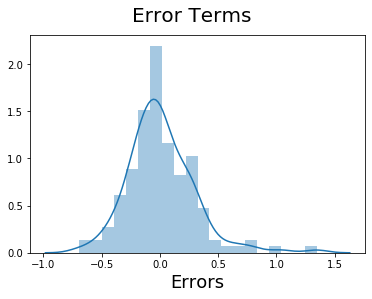

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [ ]:

num_vars =['horsepower', 'carwidth', 'Topend', 'sedan', 'dohcv','hatchback','wagon','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.shape

(62, 30)

In [ ]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Topend
160,-0.683618,95.7,2094,98,3.19,-4.801095,166.3,-8.683832,1,0,0,-2.590780,-4.677188,-12.716778,1,0,-3.060408,0,1,0,0,0,0,1,0,0,0,0,0,-29.839756
186,-0.586314,97.3,2275,109,3.19,-2.276247,171.7,-8.596210,1,0,0,-2.590780,-4.677188,-12.716778,1,0,-3.060408,0,1,0,0,0,0,1,0,0,0,0,1,-29.839756
59,-0.541325,98.8,2385,122,3.39,-2.444570,177.8,-8.516554,1,0,0,-2.565517,-4.679031,-12.716778,1,0,-3.060408,0,1,0,0,0,0,1,0,0,0,0,1,-29.839756
165,-0.483096,94.5,2265,98,3.24,2.268478,168.7,-8.715694,1,0,0,-2.590780,-4.677188,-12.716778,0,1,-3.060408,0,0,0,0,0,0,1,0,0,0,0,0,-29.839756
140,-0.700971,93.3,2240,108,3.62,-4.296125,157.3,-8.731625,1,0,0,-2.565517,-4.679031,-12.716778,0,0,-3.060408,0,0,1,0,0,0,1,0,0,0,0,0,-29.839756


In [ ]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Topend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.093658,99.295161,2592.596774,131.403226,3.381290,1.549033,175.508065,-8.551243,0.887097,0.177419,0.080645,-2.582223,-4.678199,-12.344688,0.564516,0.419355,-3.060408e+00,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.435484,-29.788587
std,1.084446,6.172983,462.719100,43.147273,0.287889,6.600003,11.681726,0.158139,0.319058,0.385142,0.274512,0.012054,0.000924,1.146034,0.499868,0.497482,4.029430e-15,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.499868,0.144603
min,-0.984273,86.600000,1819.000000,79.000000,2.540000,-7.830912,144.600000,-8.835178,0.000000,0.000000,0.000000,-2.590780,-4.679031,-12.716778,0.000000,0.000000,-3.060408e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-29.839756
25%,-0.590748,95.700000,2275.000000,108.000000,3.190000,-4.169883,169.350000,-8.667901,1.000000,0.000000,0.000000,-2.590780,-4.679031,-12.716778,0.000000,0.000000,-3.060408e+00,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,-29.839756
50%,-0.280646,97.850000,2535.000000,121.000000,3.390000,0.332762,174.800000,-8.588245,1.000000,0.000000,0.000000,-2.590780,-4.679031,-12.716778,1.000000,0.000000,-3.060408e+00,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,-29.839756
75%,0.455663,103.150000,2944.250000,144.750000,3.620000,3.446740,185.375000,-8.516554,1.000000,0.000000,0.000000,-2.565517,-4.677188,-12.716778,1.000000,1.000000,-3.060408e+00,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,-29.839756
max,4.157451,120.900000,3900.000000,308.000000,3.800000,18.259179,208.100000,-8.078447,1.000000,1.000000,1.000000,-2.565517,-4.677188,-8.871845,1.000000,1.000000,-3.060408e+00,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,-29.386539


#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('price')
X_test = df_test


In [ ]:
X_test.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'carlength', 'carwidth', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', 'Medium',
       'Topend'],
      dtype='object')

In [ ]:
#X_train_lr9 = sm.add_constant(X_train_lr9)
#X_train_lr4 = X_train_lr9.drop('const',axis=1)
X_train_lr9.columns


Index(['horsepower', 'carwidth', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'Topend'],
      dtype='object')

In [ ]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_lr9.columns]

X_test_new.columns

Index(['horsepower', 'carwidth', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'Topend'],
      dtype='object')

In [ ]:
# Making predictions using the nith model

y_pred = lm.predict(X_test_new)



## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

### Model Evaluation:

When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [ ]:
from sklearn.metrics import r2_score

# where y_test is the test data set for the target variable, and y_pred is the variable
r2_score(y_test, y_pred)



-1025.2745312970524

Text(0, 0.5, 'y_pred')

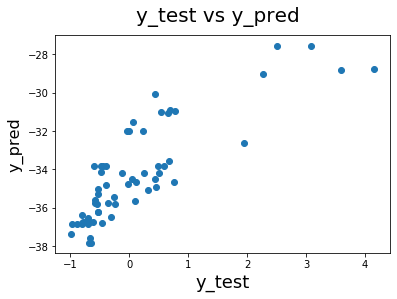

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [ ]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.70e-70
Time:                        19:21:43   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.116      2.096      0.0


We can see that the equation of our best fitted line is:

$ price =  (horsepower x 0.3599) + (carwidth x 0.3652) + (hatchback x -0.4859) + (sedan x -0.3518) + (wagon x -0.4023) + (dohcv x -1.4450) + (Topend x 1.2895)

